# Projeto facerecog

In [1]:
%%writefile requirements.txt

# lista extensa do environment, depois filtro para os que foram utilizados realmente
ipython==5.1.0
ipython-genutils==0.1.0
ipywidgets==5.2.2
jupyter-client==4.4.0
jupyter-core==4.2.0
matplotlib==1.5.3
notebook==4.2.2
numpy==1.11.1
pandas==0.18.1
Pillow==3.3.1
pytesseract==0.1.6
scikit-image==0.12.3
seaborn==0.7.1

# the following must be installed separately
# opencv==3.1.0
# tesseract

Overwriting requirements.txt


In [2]:
# uncomment line below to install requirements (recommended to use a virtualenv)
#!pip install -r requirements.txt

In [3]:
%matplotlib inline
""" handling files support packages """
from glob import glob

""" logic support packages """
import numpy as np
import pytesseract

""" plot support packages """
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

""" image trasformation packages """
from PIL import Image
import skimage.io as skio
from skimage.util import dtype_limits
from skimage.morphology import label
from skimage.measure import regionprops
from skimage.filters import rank
from skimage.measure import compare_ssim as ssim

""" statistical data visualization packages"""
import seaborn as sns

""" seaborn configurations """
sns.set_style('white')
sns.set_context('talk')
plt.rcParams['figure.figsize'] = 20, 10

In [4]:
img_files = sorted(glob('../imagens/*.png'))

imgs = skio.imread_collection(img_files)

def plot_captchas(imgs, grid=(5, 4)):
    gs = gridspec.GridSpec(*grid)
    for idx, gspec in enumerate(gs):
        ax = plt.subplot(gspec)
        plt.imshow(imgs[idx])

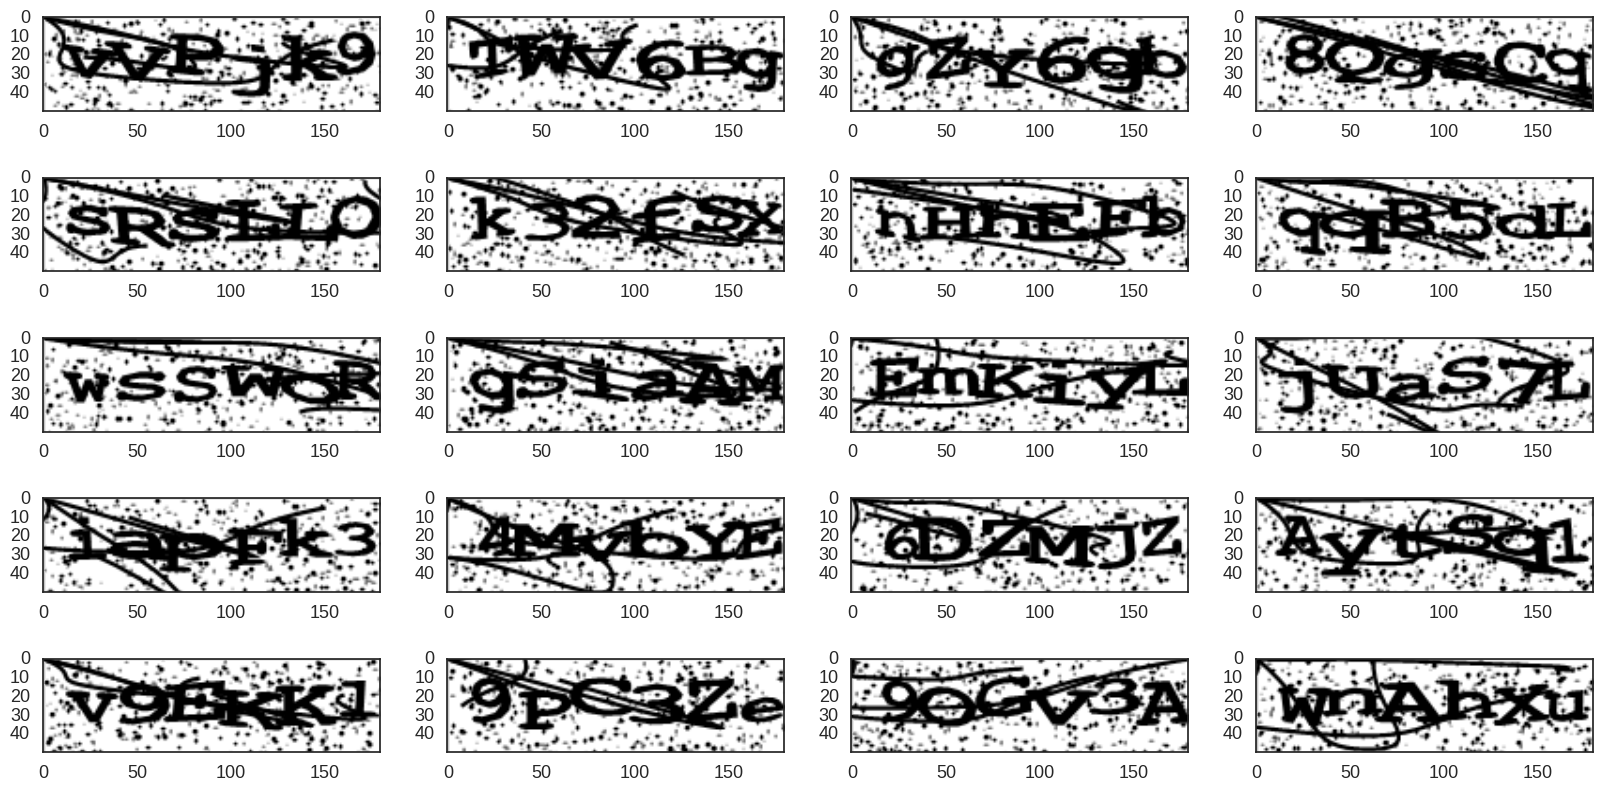

In [5]:
plot_captchas(imgs)

In [6]:
def remove_small_blobs(bw_img, min_area=10, **label_kwargs):
    """ Remove small blobs in the bw img. """
    labels = label(bw_img, **label_kwargs)

    # pick the background and foreground colors
    bg = label_kwargs.get('background', 0) 
    fg = dtype_limits(bw_img, clip_negative=True)[1] - bg

    # create an empty image
    new_bw = np.ones_like(bw_img) * bg
    
    # check the area of each region
    for roi in regionprops(labels):
        if roi.area >= min_area:
            new_bw[labels == roi.label] = fg

    return new_bw

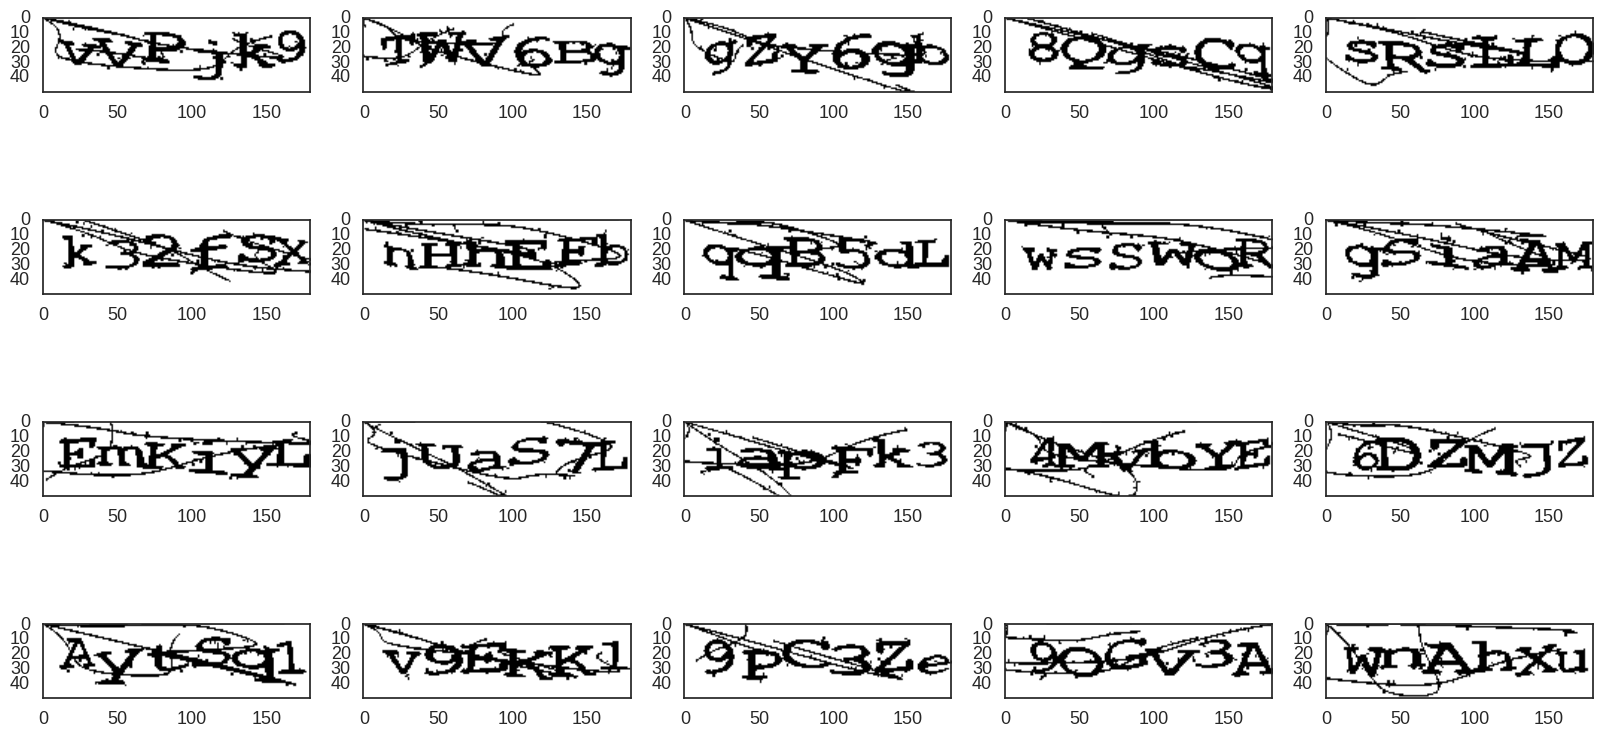

In [7]:
unblobbed = [remove_small_blobs(img, min_area=50, background=255) for img in imgs]
plot_captchas(unblobbed, (4, 5))

In [8]:
for img in unblobbed:
    img = Image.fromarray( img )
    print( pytesseract.image_to_string( img ) )









WSS





M32







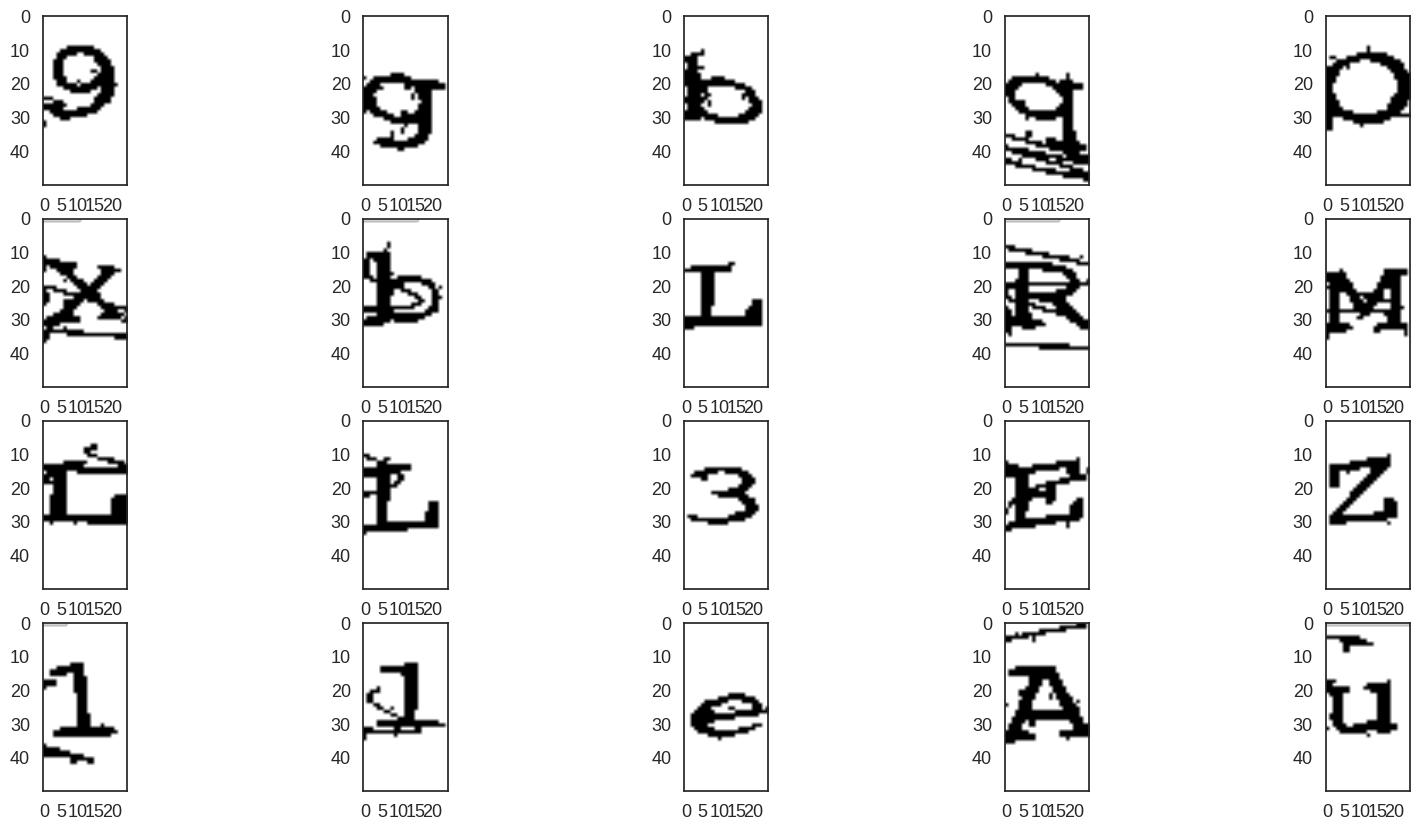

In [9]:
# 6º caractere
x1 = 0
x2 = 50
y1 = 155
y2 = 190
cropped6 = [img[x1:x2, y1:y2] for img in unblobbed ]
plot_captchas( cropped6, (4, 5) )

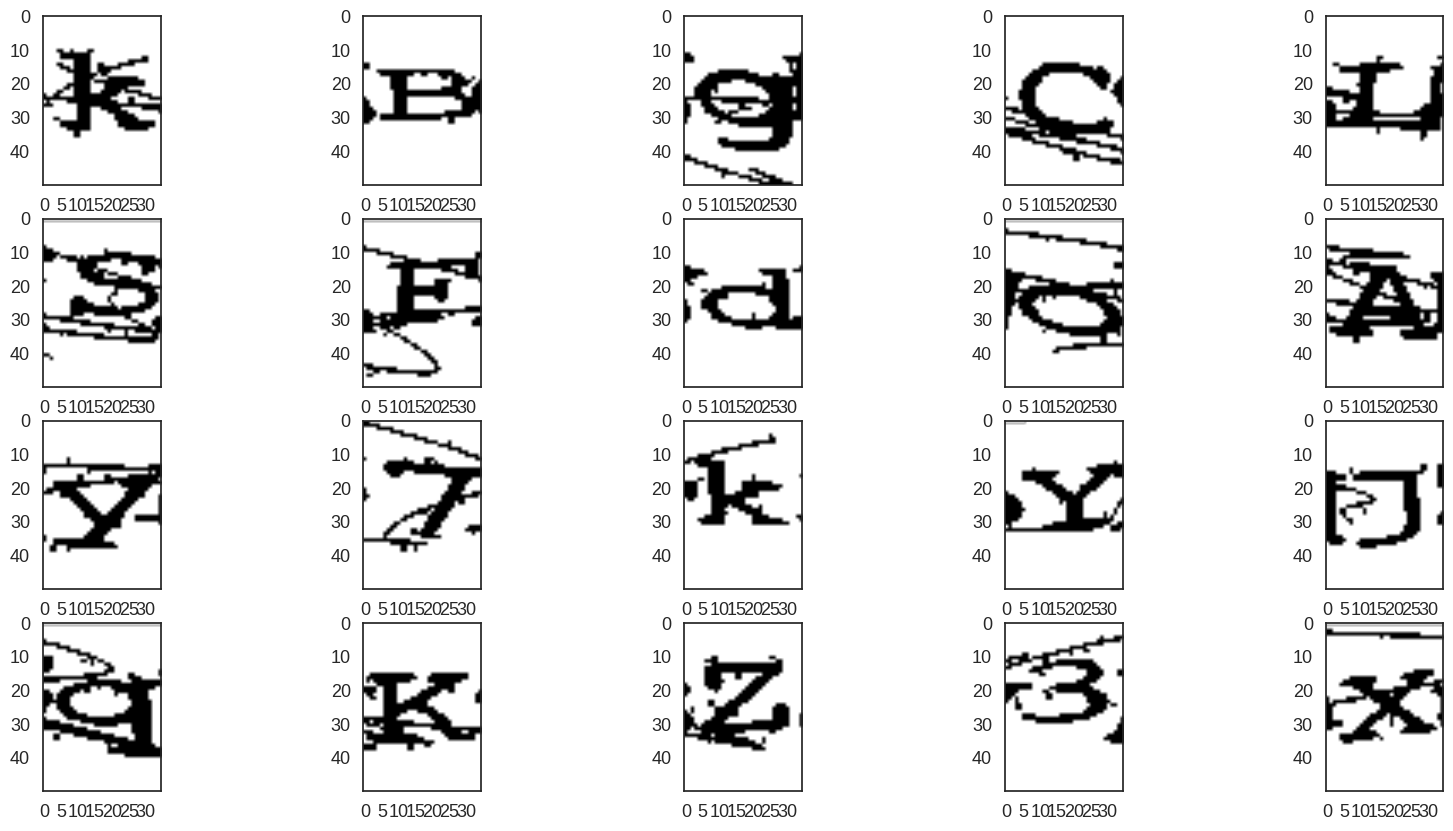

In [10]:
# 5º caractere
x1 = 0
x2 = 50
y1 = 123
y2 = 158
cropped5 = [img[x1:x2, y1:y2] for img in unblobbed ]
plot_captchas( cropped5, (4, 5) )

In [11]:
captcha_letters = dict()
captcha_letters.clear()

In [12]:
letters = ('k', 'b', 'g', 'c', 'l',
           's', 'f', 'd', 'o', 'a',
           'y', '7', 'k', 'y', 'j',
           'q', 'k', 'z', '3', 'x')

for letter, img in zip(letters, cropped5):
    
    if letter in captcha_letters:
        captcha_letters[letter].append(img)
    else:
        captcha_letters[letter] = [img]

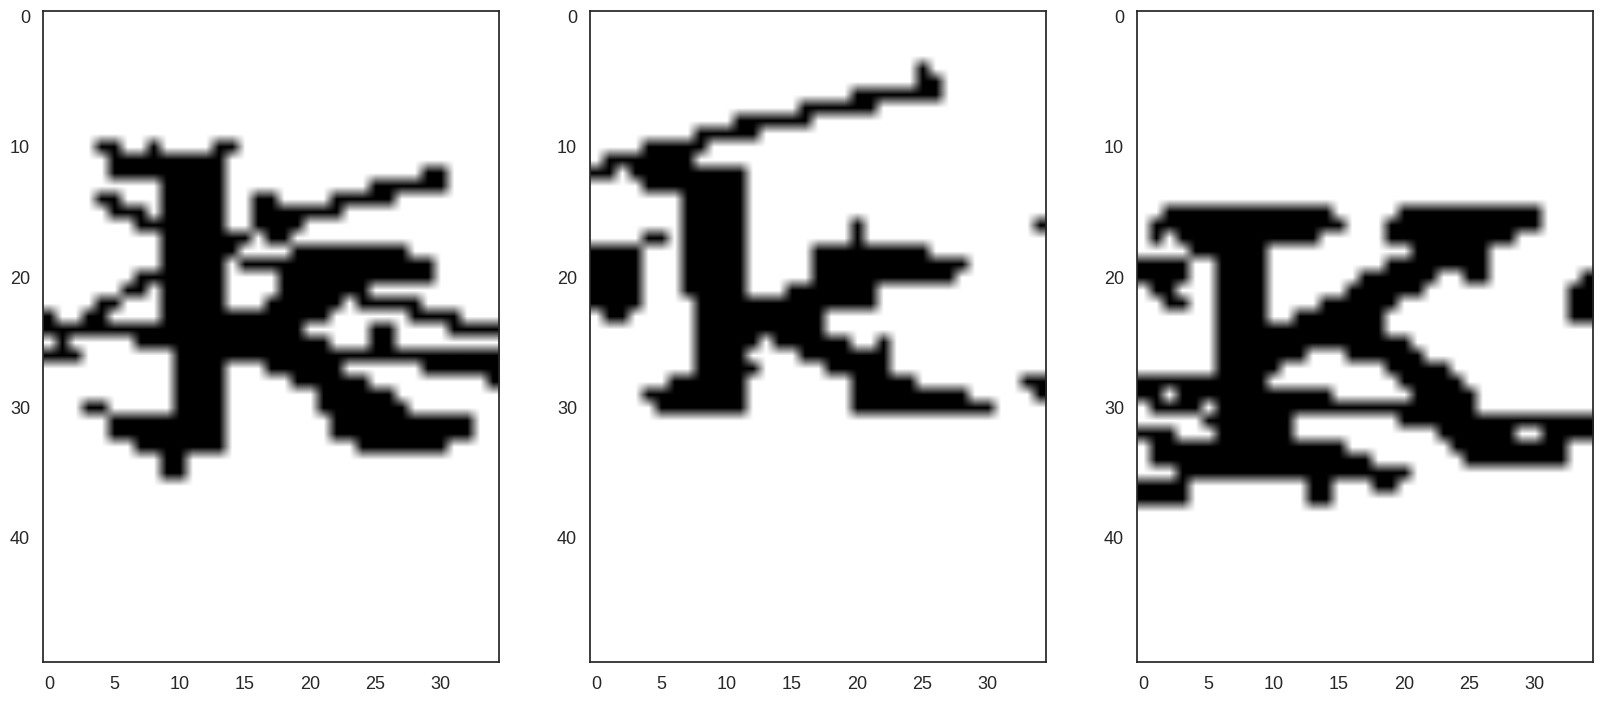

In [13]:
plot_captchas( captcha_letters['k'], (1, 3) )

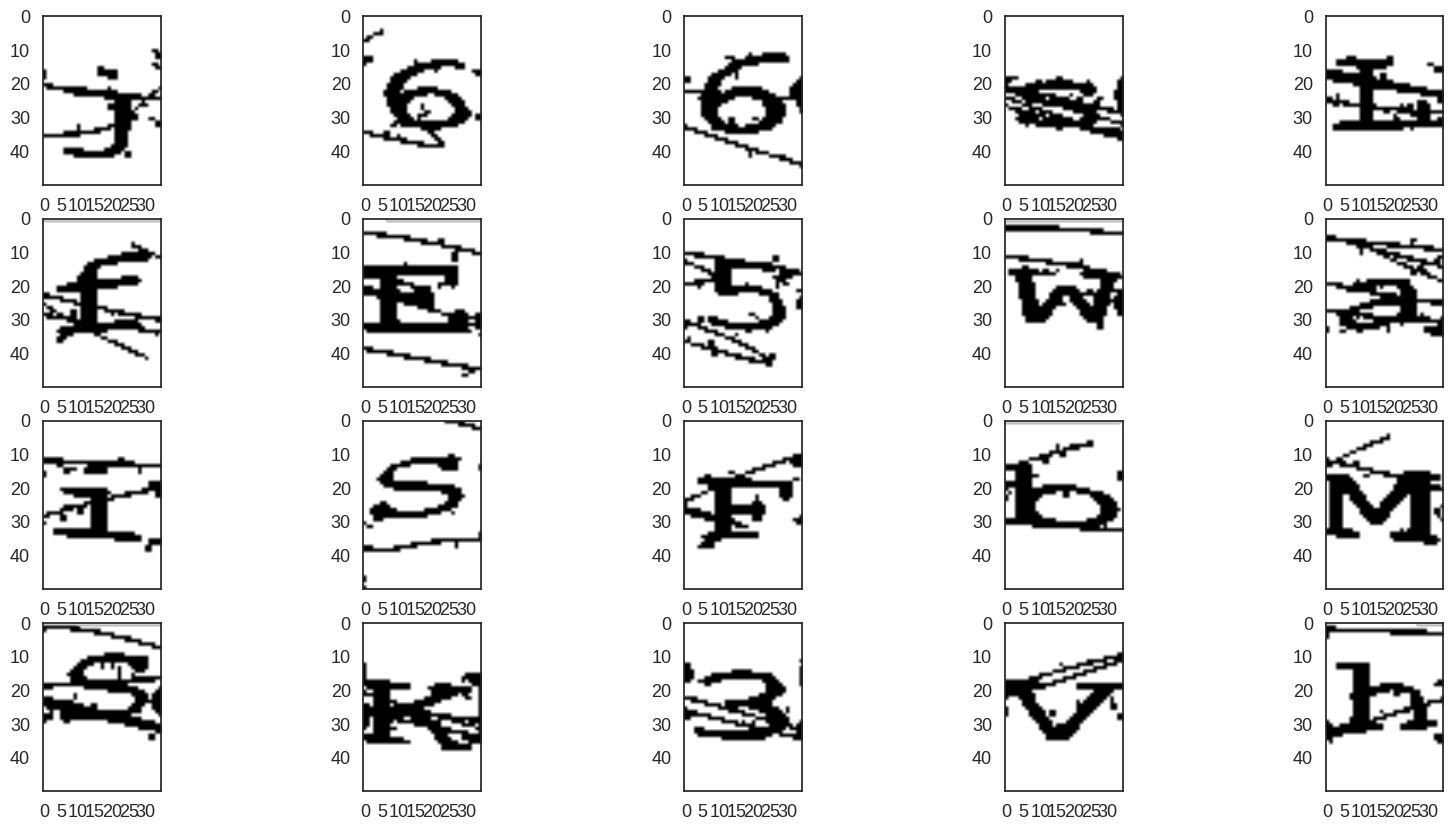

In [14]:
# 4º caractere
x1 = 0
x2 = 50
y1 = 95
y2 = 130
cropped4 = [img[x1:x2, y1:y2] for img in unblobbed ]
plot_captchas( cropped4, (4, 5) )

In [15]:
letters = ('j', '6', '6', 's', 'l',
           'f', 'e', '5', 'w', 'a',
           'i', 's', 'f', 'b', 'm',
           's', 'k', '3', 'v', 'h')

for letter, img in zip(letters, cropped4):
    
    if letter in captcha_letters:
        captcha_letters[letter].append(img)
    else:
        captcha_letters[letter] = [img]

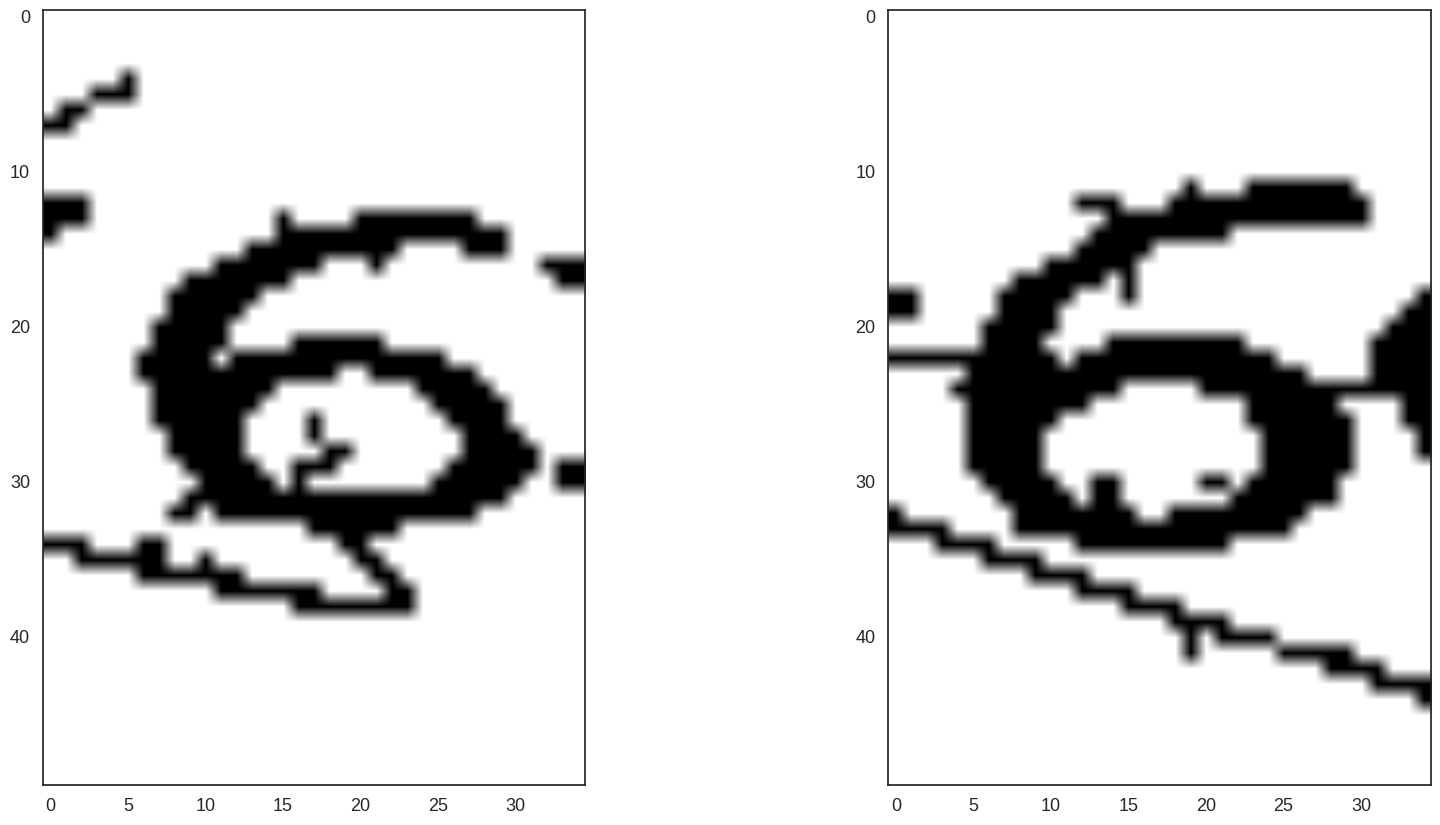

In [16]:
plot_captchas( captcha_letters['6'], (1, 2) )

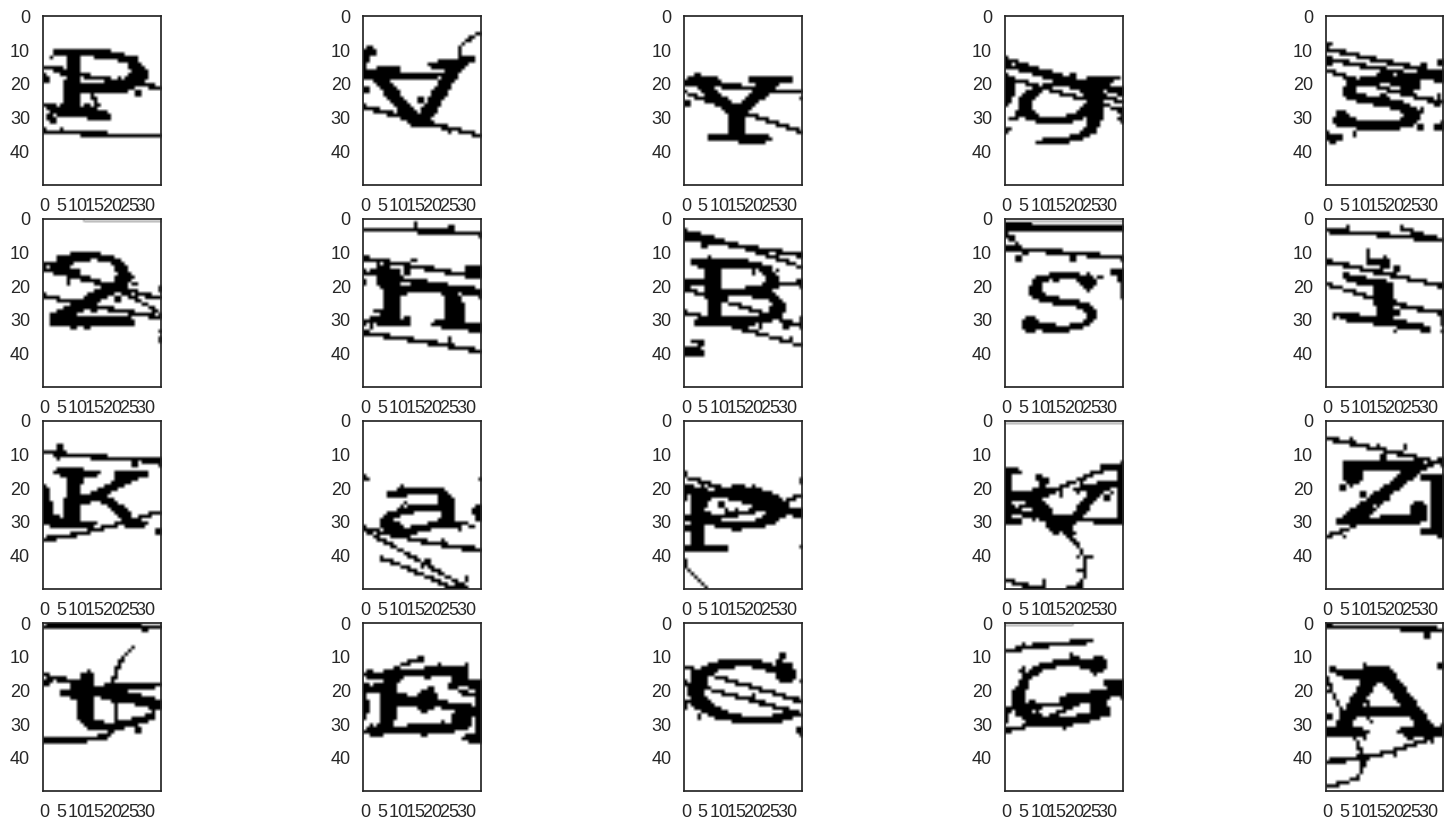

In [17]:
# 3º caractere
x1 = 0
x2 = 50
y1 = 65
y2 = 100
cropped3 = [img[x1:x2, y1:y2] for img in unblobbed ]
plot_captchas( cropped3, (4, 5) )

In [18]:
letters = ('p', 'v', 'y', 'g', 's',
           '2', 'n', 'b', 's', 'i',
           'k', 'a', 'p', 'v', 'z',
           't', 'e', 'c', 'g', 'a')

for letter, img in zip(letters, cropped3):
    
    if letter in captcha_letters:
        captcha_letters[letter].append(img)
    else:
        captcha_letters[letter] = [img]

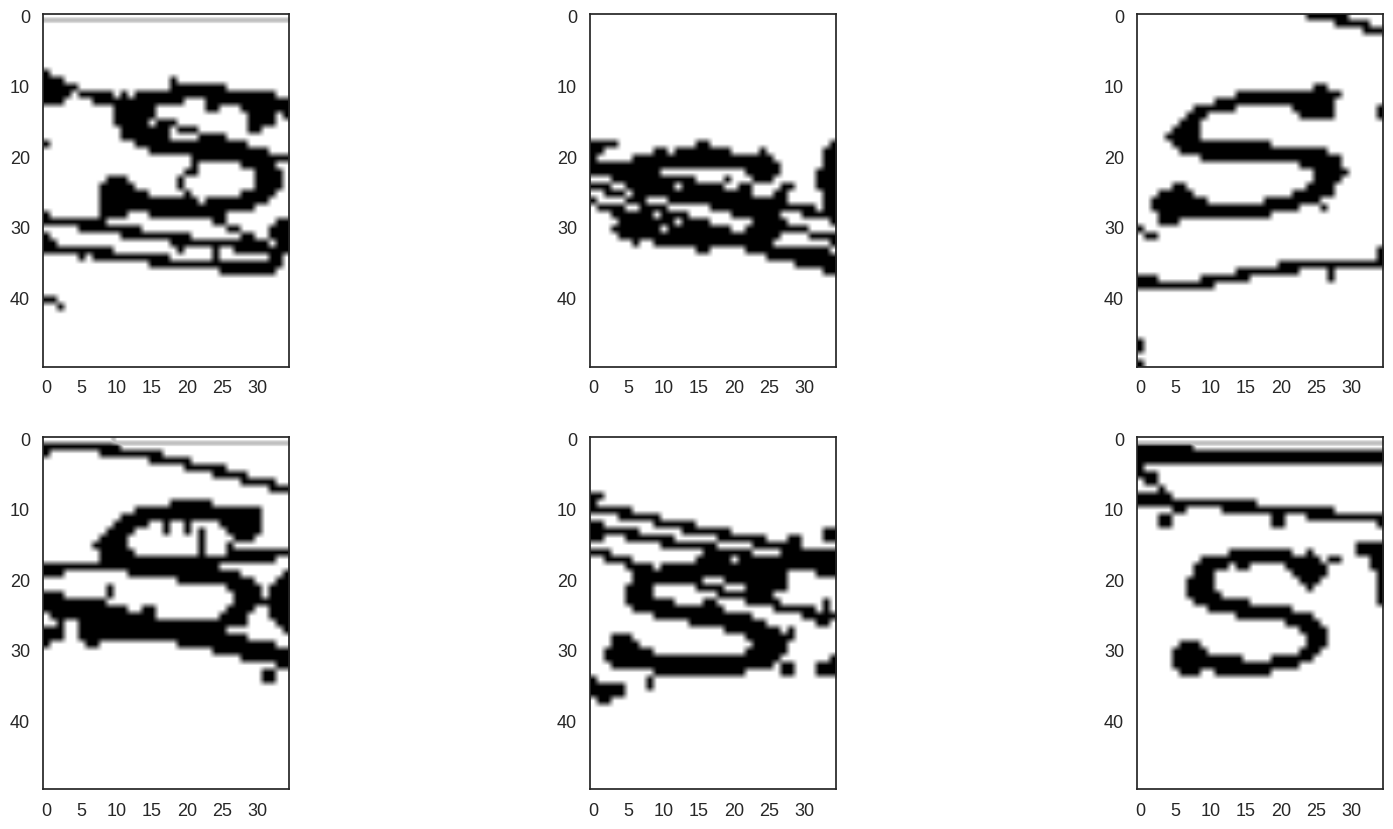

In [20]:
plot_captchas( captcha_letters['s'], (2, 3) )

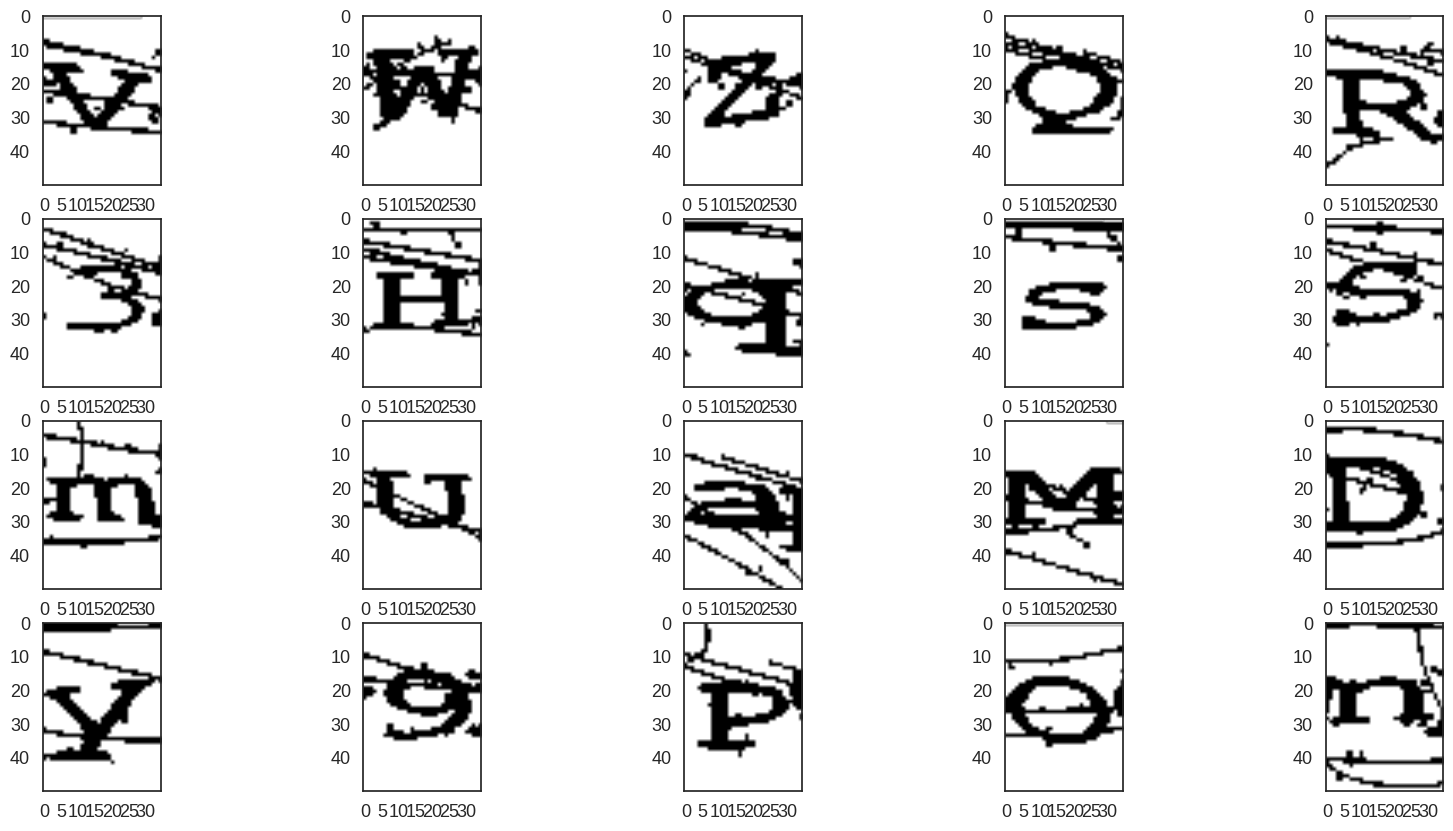

In [21]:
# 2º caractere
x1 = 0
x2 = 50
y1 = 35
y2 = 70
cropped2 = [img[x1:x2, y1:y2] for img in unblobbed ]
plot_captchas( cropped2, (4, 5) )

In [22]:
letters = ('v', 'w', 'z', 'q', 'e',
           '3', 'h', 'q', 's', 's',
           'm', 'u', 'a', 'm', 'd',
           'y', '9', 'p', 'o', 'n')

for letter, img in zip(letters, cropped2):
    
    if letter in captcha_letters:
        captcha_letters[letter].append(img)
    else:
        captcha_letters[letter] = [img]

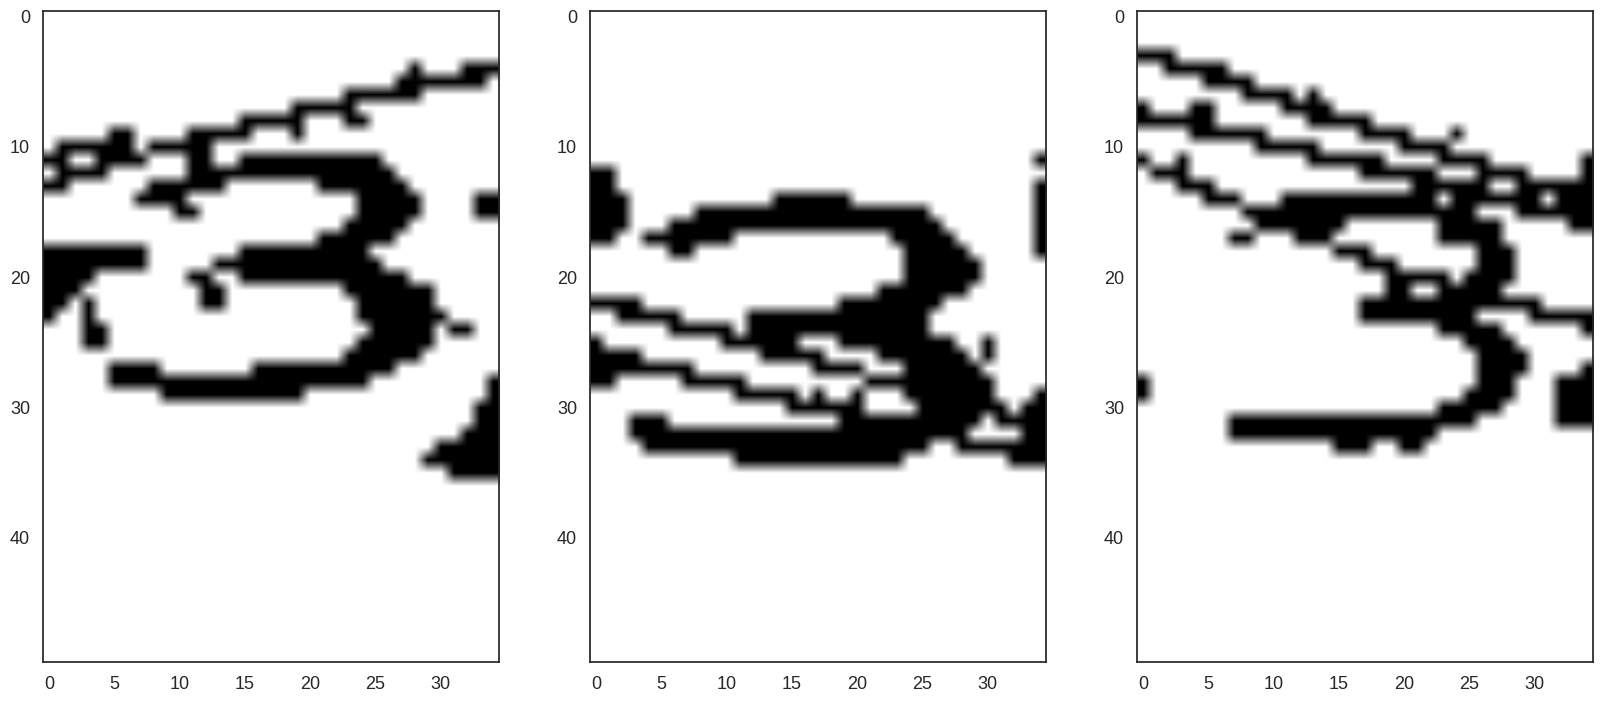

In [23]:
plot_captchas( captcha_letters['3'], (1, 3) )

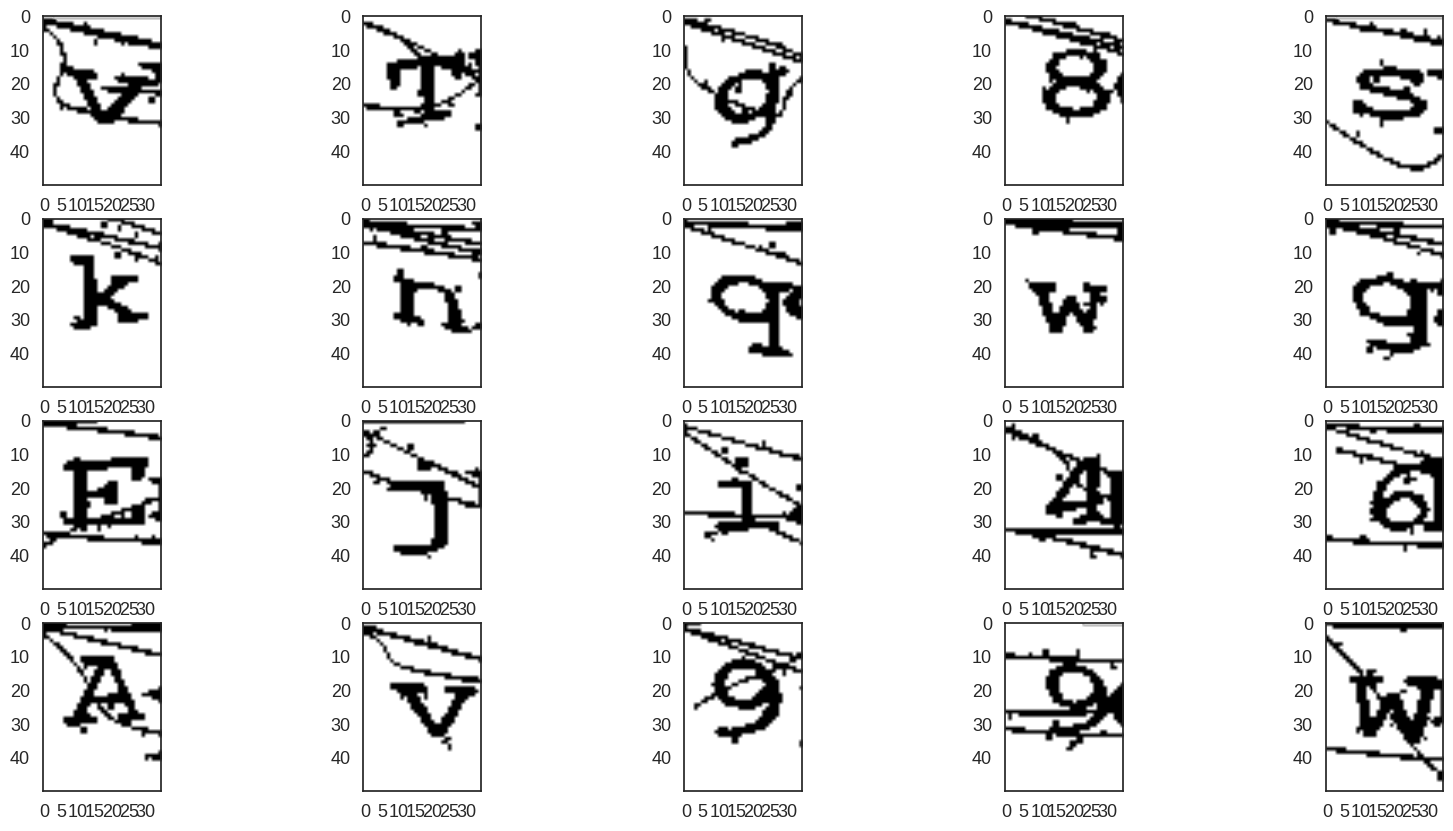

In [24]:
# 1º caractere
x1 = 0
x2 = 50
y1 = 5
y2 = 40
cropped1 = [img[x1:x2, y1:y2] for img in unblobbed ]
plot_captchas( cropped1, (4, 5) )

In [25]:
letters = ('v', 't', 'g', '8', 's',
           'k', 'n', 'q', 'w', 'g',
           'e', 'j', 'i', '4', '6',
           'a', 'v', '9', '9', 'w')

for letter, img in zip(letters, cropped1):
    
    if letter in captcha_letters:
        captcha_letters[letter].append(img)
    else:
        captcha_letters[letter] = [img]

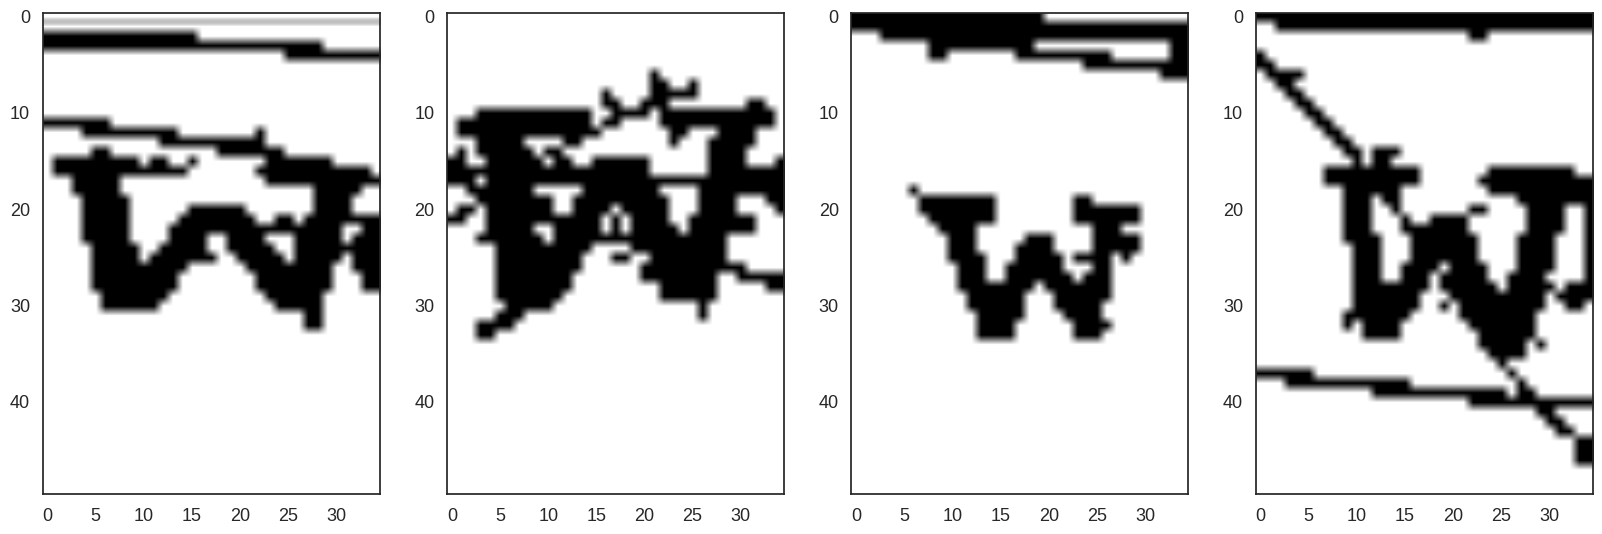

In [26]:
plot_captchas( captcha_letters['w'], (1, 4) )

In [27]:
def mse(imageA, imageB):
    # the 'Mean Squared Error' between the two images is the
    # sum of the squared difference between the two images;
    # NOTE: the two images must have the same dimension
    err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1])
    
    # return the MSE, the lower the error, the more "similar"
    # the two images are
    return err


In [28]:
def compare_images(imageA, imageB, title, channel=True):
    # compute the mean squared error and structural similarity
    # index for the images
    m = mse(imageA, imageB)
    s = ssim(imageA, imageB, multichannel=channel)
 
    # setup the figure
    fig = plt.figure(title)
    plt.suptitle("MSE: %.2f, SSIM: %.2f" % (m, s))
 
    # show first image
    ax = fig.add_subplot(1, 2, 1)
    plt.imshow(imageA, cmap = plt.cm.gray)
    plt.axis("off")
 
    # show the second image
    ax = fig.add_subplot(1, 2, 2)
    plt.imshow(imageB, cmap = plt.cm.gray)
    plt.axis("off")
 
    # show the images
    plt.show()

/home/rico/envs/py3/lib/python3.5/site-packages/skimage/measure/_structural_similarity.py:224: skimage_deprecation: Call to deprecated function ``structural_similarity``. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,
/home/rico/envs/py3/lib/python3.5/site-packages/skimage/measure/_structural_similarity.py:224: skimage_deprecation: Call to deprecated function ``structural_similarity``. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,
/home/rico/envs/py3/lib/python3.5/site-packages/skimage/measure/_structural_similarity.py:224: skimage_deprecation: Call to deprecated function ``structural_similarity``. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,
/home/rico/envs/py3/lib/python3.5/site-packages/skimage/measure/_structural_similarity.py:224: skimage_deprecation: Call to deprecated function ``structural_similarity``. Use ``compare_ssim`` instead.
 

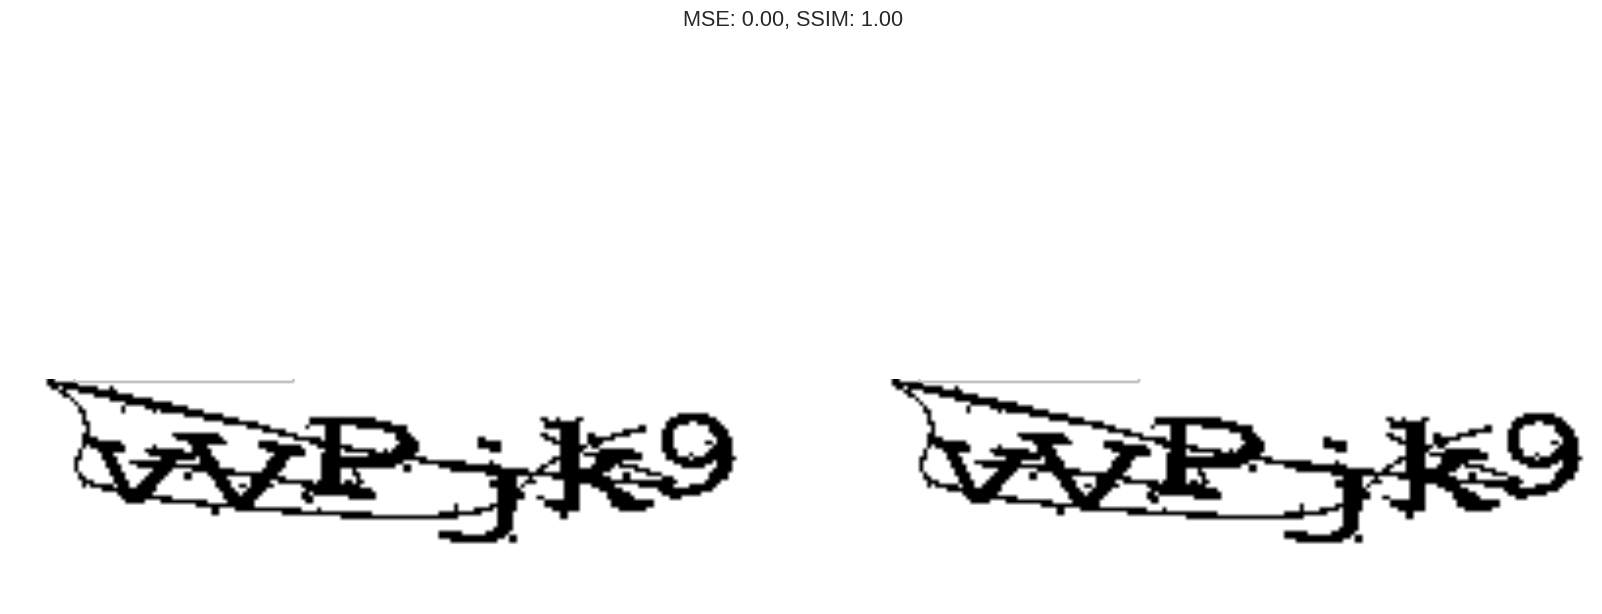

In [29]:
compare_images(unblobbed[0], unblobbed[0], "two captchas")

/home/rico/envs/py3/lib/python3.5/site-packages/skimage/measure/_structural_similarity.py:224: skimage_deprecation: Call to deprecated function ``structural_similarity``. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,
/home/rico/envs/py3/lib/python3.5/site-packages/skimage/measure/_structural_similarity.py:224: skimage_deprecation: Call to deprecated function ``structural_similarity``. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,
/home/rico/envs/py3/lib/python3.5/site-packages/skimage/measure/_structural_similarity.py:224: skimage_deprecation: Call to deprecated function ``structural_similarity``. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,
/home/rico/envs/py3/lib/python3.5/site-packages/skimage/measure/_structural_similarity.py:224: skimage_deprecation: Call to deprecated function ``structural_similarity``. Use ``compare_ssim`` instead.
 

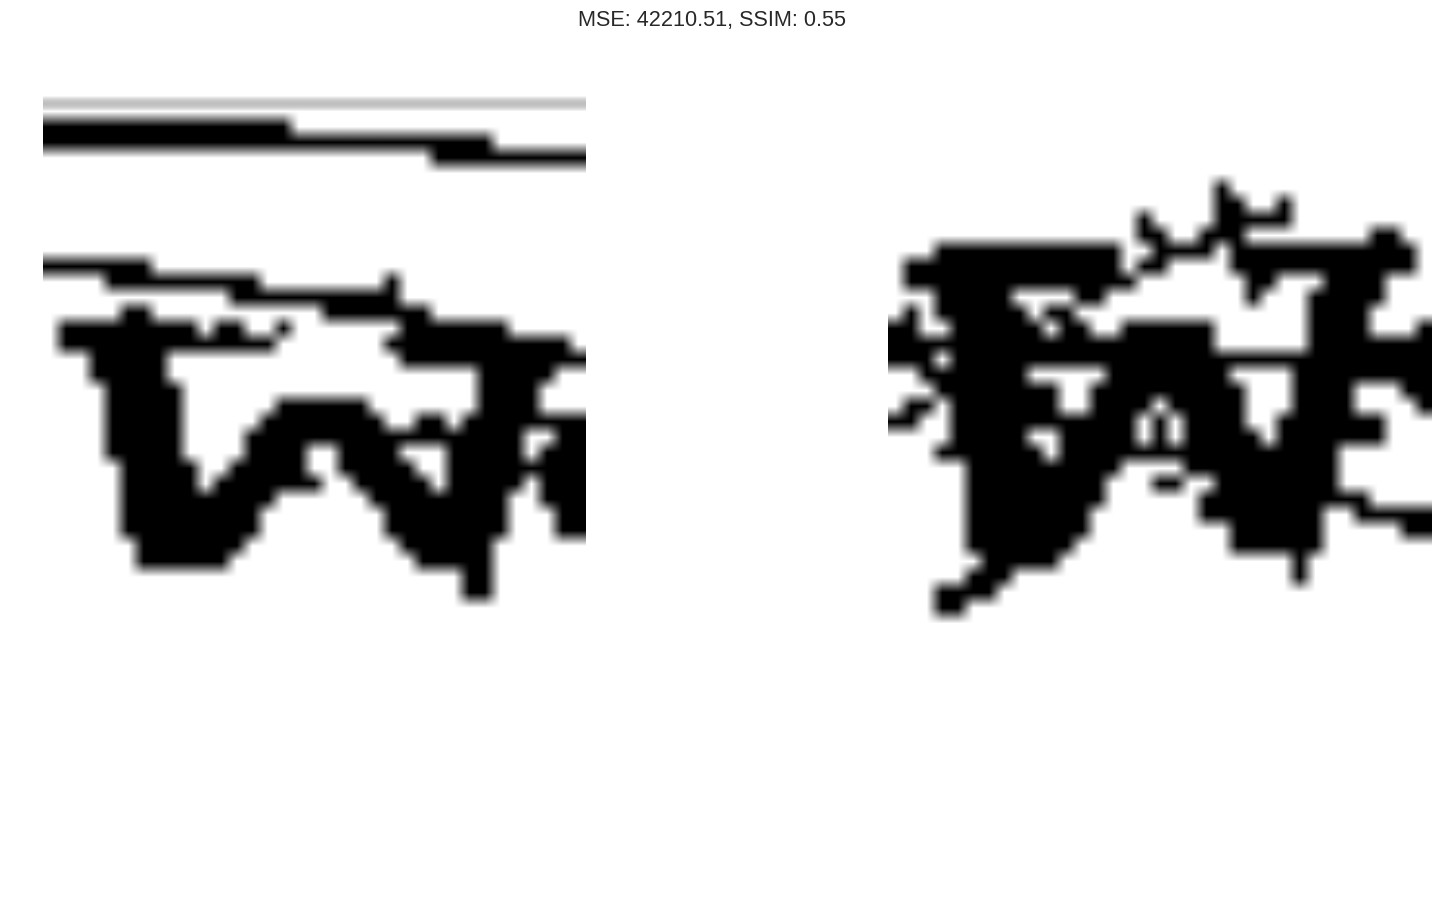

In [30]:
compare_images(captcha_letters['w'][0], captcha_letters['w'][1], "two W's")

/home/rico/envs/py3/lib/python3.5/site-packages/skimage/measure/_structural_similarity.py:224: skimage_deprecation: Call to deprecated function ``structural_similarity``. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,
/home/rico/envs/py3/lib/python3.5/site-packages/skimage/measure/_structural_similarity.py:224: skimage_deprecation: Call to deprecated function ``structural_similarity``. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,
/home/rico/envs/py3/lib/python3.5/site-packages/skimage/measure/_structural_similarity.py:224: skimage_deprecation: Call to deprecated function ``structural_similarity``. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,
/home/rico/envs/py3/lib/python3.5/site-packages/skimage/measure/_structural_similarity.py:224: skimage_deprecation: Call to deprecated function ``structural_similarity``. Use ``compare_ssim`` instead.
 

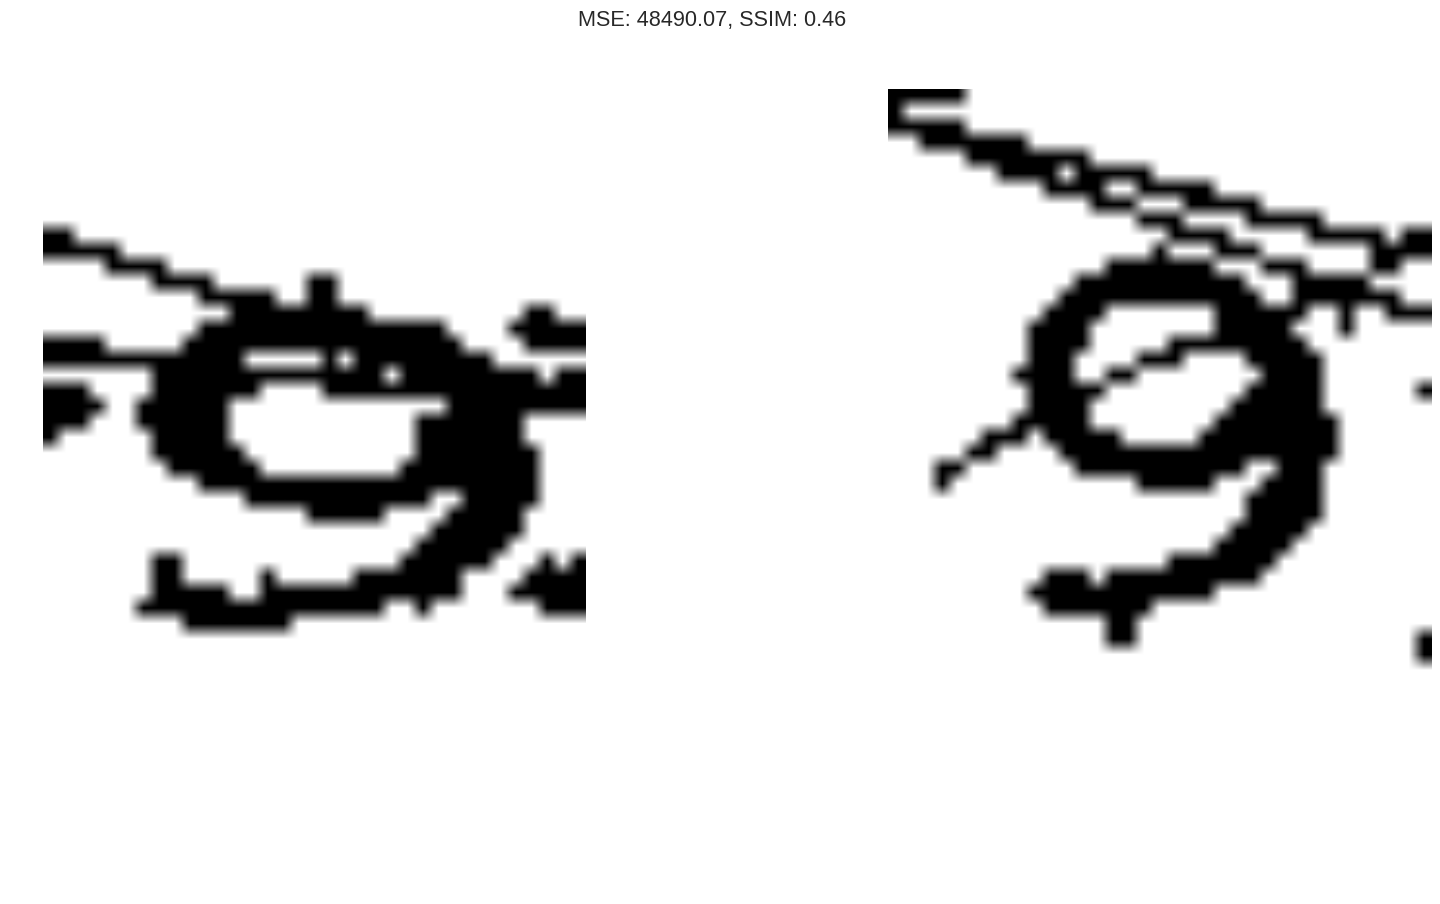

In [32]:
compare_images(captcha_letters['9'][0], captcha_letters['9'][1], "two 9's")

/home/rico/envs/py3/lib/python3.5/site-packages/skimage/measure/_structural_similarity.py:224: skimage_deprecation: Call to deprecated function ``structural_similarity``. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,
/home/rico/envs/py3/lib/python3.5/site-packages/skimage/measure/_structural_similarity.py:224: skimage_deprecation: Call to deprecated function ``structural_similarity``. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,
/home/rico/envs/py3/lib/python3.5/site-packages/skimage/measure/_structural_similarity.py:224: skimage_deprecation: Call to deprecated function ``structural_similarity``. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,
/home/rico/envs/py3/lib/python3.5/site-packages/skimage/measure/_structural_similarity.py:224: skimage_deprecation: Call to deprecated function ``structural_similarity``. Use ``compare_ssim`` instead.
 

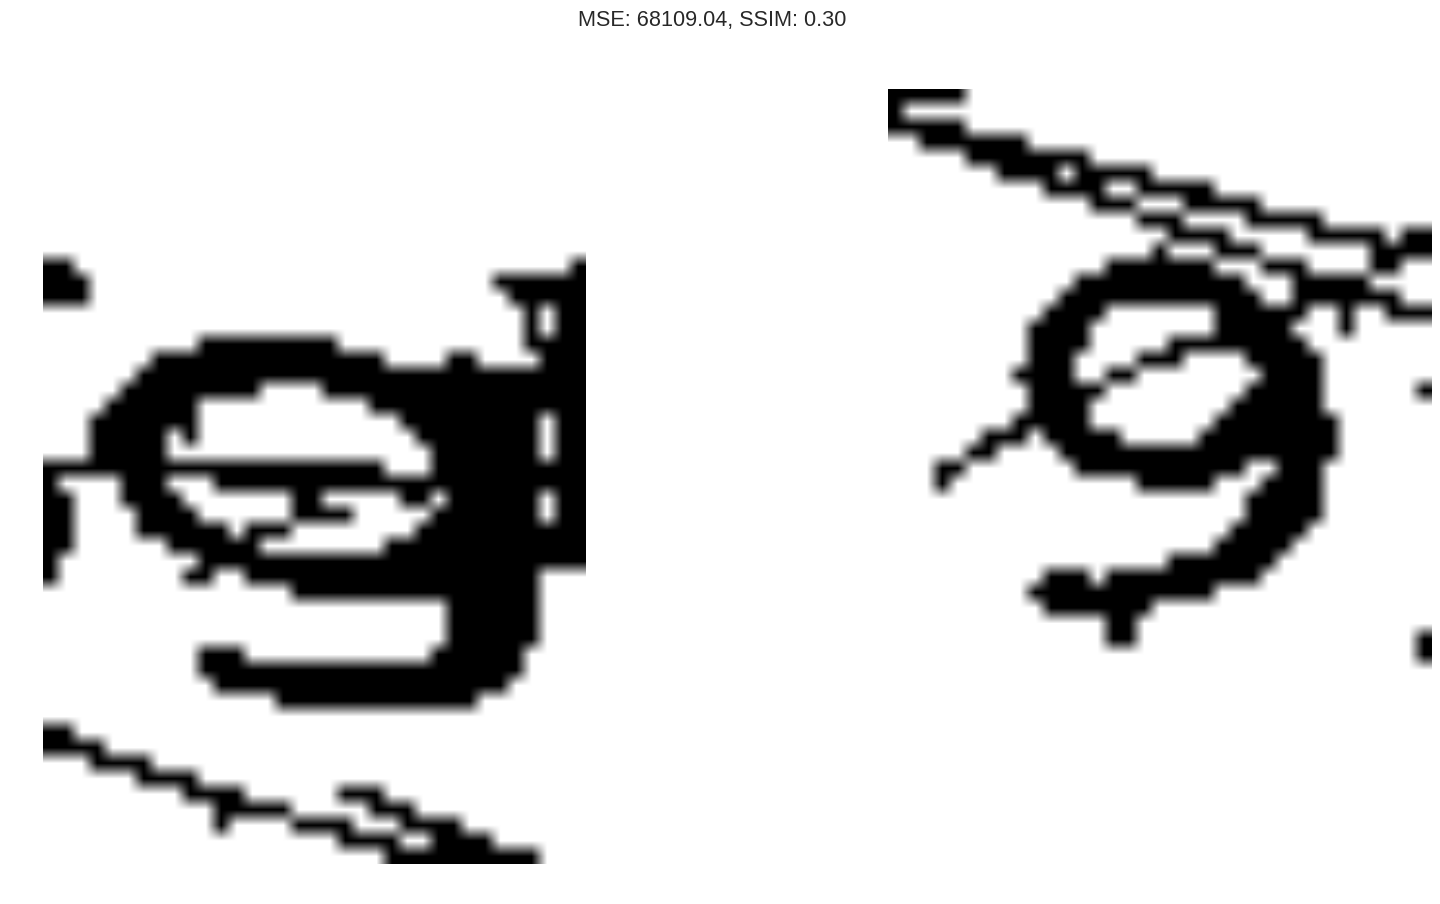

In [33]:
compare_images(captcha_letters['g'][0], captcha_letters['9'][1], "two differents")